In [1]:
import numpy as np
import pandas as pd 
import os
import sys
import random
from tqdm.notebook import tqdm

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from mne.io import concatenate_raws, read_raw_edf
import antropy as ant
import mne
import mne_features
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
import warnings

In [58]:
df_higuchi_final = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz_final = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian_final = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent_final = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent_final = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent_final = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent_final = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent_final = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth_final = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross_final = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv_final = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc_final = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation

## Looping through the files

Use the concurrent.futures.ThreadPoolExecutor function to perform multithreading
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

def process_file(file_path):
    temp_df = pd.read_csv(file_path)
    
    # Perform your operations on the temp_df here
    # ...
    
    return temp_df

# Get the list of file paths
input_directory = 'path/to/your/input/files'
file_paths = [os.path.join(input_directory, file) for file in os.listdir(input_directory) if file.endswith('.csv')]

# Initialize an empty DataFrame for the final result
final_df = pd.DataFrame()

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    processed_dfs = list(executor.map(process_file, file_paths))

# Concatenate all the processed DataFrames into the final DataFrame
final_df = pd.concat(processed_dfs, ignore_index=True)

In [2]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"
subject = 'sub-001'
if (os.path.exists(f"{os_path}{subject}")):
    print('Yes')

Yes


In [3]:
filenames_list = os.listdir(f"{os_path}")
print(filenames_list)

['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-047', 'sub-048', 'sub-049', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-054', 'sub-055', 'sub-056', 'sub-057', 'sub-058', 'sub-059', 'sub-060', 'sub-061', 'sub-062', 'sub-063', 'sub-064', 'sub-065', 'sub-066', 'sub-067', 'sub-068', 'sub-069', 'sub-070', 'sub-071', 'sub-072', 'sub-073', 'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081', 'sub-082', 'sub-083', 'sub-084', 'sub-085', 'sub-086', 'sub-087', 'sub-088']


In [4]:
.9*500

450.0

In [5]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

subject = 'sub-001'
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/{subject}/eeg/"
filename = f"{subject}_task-eyesclosed_eeg.set"
EEG_data = mne.io.read_raw_eeglab(f"{path}{filename}", preload=True)
raw = EEG_data

df_higuchi_final = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz_final = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian_final = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent_final = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent_final = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent_final = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent_final = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent_final = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth_final = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross_final = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv_final = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc_final = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation

for subject in tqdm(filenames_list):

    path_eeg = f"{os_path}{subject}/eeg/{subject}_task-eyesclosed_eeg.set"
    tqdm.write(f"{subject} started", end="\r")
    sys.stdout.flush()

    # import EEG file
    EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)
    low_freq, high_freq = 1.0, 40.0 # values in Hz
    raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4, verbose='ERROR')

    std_montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(std_montage)

    xRaw = raw.get_data()
    tqdm.write(f"Length of EEG: {len(xRaw[0])/500.0}", end="\r")
    sys.stdout.flush()

    # Calculating Fractal Dimensions
    tqdm.write(f"Calculating Fractal Dimensions for {subject}", end='\r')
    sys.stdout.flush()
    #len(x_raw)
    df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi
    df_katz = pd.DataFrame(columns = raw.ch_names) # Katz
    df_petrosian = pd.DataFrame(columns = raw.ch_names) # Petrosian
    df_spec_ent = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
    df_perm_ent = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

    df_svd_ent = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
    df_app_ent = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
    df_samp_ent = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
    df_hjorth = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
    df_num_zerocross = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
    df_lziv = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
    df_det_fluc = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation


    channel_no=0
    for row in xRaw: #row === channel_no.
        
        hig_channel_series = []
        katz_channel_series = []
        petrosian_channel_series = []
        spec_ent_channel_series = []
        perm_ent_channel_series = []

        df_svd_ent_channel_series = []
        df_app_ent_channel_series = []
        df_samp_ent_channel_series = []
        df_hjorth_channel_series = []
        df_num_zerocross_channel_series = []
        df_lziv_channel_series = []
        df_det_fluc_channel_series = []
        
        for i in range(500,len(xRaw[0]),50):
            hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
            katz_channel_series.append(ant.katz_fd(row[i-500:i]))
            petrosian_channel_series.append(ant.petrosian_fd(row[i-500:i]))
            spec_ent_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=1000, method='welch', normalize=True))
            perm_ent_channel_series.append(ant.perm_entropy(row[i-500:i], normalize=True))

            df_svd_ent_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
            df_app_ent_channel_series.append(ant.app_entropy(row[i-500:i]))
            df_samp_ent_channel_series.append(ant.sample_entropy(row[i-500:i]))
            df_hjorth_channel_series.append(ant.hjorth_params(row[i-500:i]))
            df_num_zerocross_channel_series.append(ant.num_zerocross(row[i-500:i]))
            df_lziv_channel_series.append(ant.lziv_complexity(row[i-500:i]))
            df_det_fluc_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))


            
        df_higuchi.iloc[:,channel_no] = hig_channel_series
        df_katz.iloc[:,channel_no] = katz_channel_series
        df_petrosian.iloc[:,channel_no] = petrosian_channel_series
        df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
        df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series

        df_svd_ent.iloc[:,channel_no] = df_svd_ent_channel_series
        df_app_ent.iloc[:,channel_no] = df_app_ent_channel_series
        df_samp_ent.iloc[:,channel_no] = df_samp_ent_channel_series
        df_hjorth.iloc[:,channel_no] = df_hjorth_channel_series
        df_num_zerocross.iloc[:,channel_no] = df_num_zerocross_channel_series
        df_lziv.iloc[:,channel_no] = df_lziv_channel_series
        df_det_fluc.iloc[:,channel_no] = df_det_fluc_channel_series
        
        #print(len(channel_series))
        channel_no += 1
    
    # Adding subject number to the dataframe
    subject_num = int(subject.split('-')[1])

    df_higuchi['subject'] = subject_num
    df_katz['subject'] = subject_num
    df_petrosian['subject'] = subject_num
    df_spec_ent['subject'] = subject_num
    df_perm_ent['subject'] = subject_num

    df_svd_ent['subject'] = subject_num
    df_app_ent['subject'] = subject_num
    df_samp_ent['subject'] = subject_num
    df_hjorth['subject'] = subject_num
    df_num_zerocross['subject'] = subject_num
    df_lziv['subject'] = subject_num
    df_det_fluc['subject'] = subject_num


    df_higuchi_final = df_higuchi_final.append(df_higuchi)
    df_katz_final = df_katz_final.append(df_katz)
    df_petrosian_final = df_petrosian_final.append(df_petrosian)
    df_spec_ent_final = df_spec_ent_final.append(df_spec_ent)
    df_perm_ent_final = df_perm_ent_final.append(df_perm_ent)

    df_svd_ent_final = df_svd_ent_final.append(df_svd_ent)
    df_app_ent_final = df_app_ent_final.append(df_app_ent)
    df_samp_ent_final = df_samp_ent_final.append(df_samp_ent)
    df_hjorth_final = df_hjorth_final.append(df_hjorth)
    df_num_zerocross_final = df_num_zerocross_final.append(df_num_zerocross)
    df_lziv_final = df_lziv_final.append(df_lziv)
    df_det_fluc_final = df_det_fluc_final.append(df_det_fluc)

    tqdm.write(f"{subject} done", end='\r')


  0%|          | 0/88 [00:00<?, ?it/s]

In [140]:
df_num_zerocross_final

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz,subject
0,14,14,20,19,18,14,14,16,16,14,14,10,18,22,14,12,14,13,14,1.0
1,8,12,16,16,10,10,6,11,8,10,14,14,12,18,8,8,10,8,6,1.0
2,6,10,16,12,10,12,8,10,12,14,12,20,12,18,10,10,10,12,10,1.0
3,12,10,12,8,10,10,8,7,12,10,8,10,12,14,10,12,8,10,10,1.0
4,21,17,19,17,23,17,15,13,17,15,15,19,15,19,15,15,15,15,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,12,12,10,10,6,6,4,4,4,6,10,10,8,6,6,4,8,4,4,1.0
1194,14,10,10,10,4,6,4,5,5,7,8,8,6,4,4,6,10,4,5,1.0
1195,6,2,4,4,2,2,4,6,4,8,2,2,2,2,4,6,4,2,6,1.0
1196,7,7,3,3,5,3,5,8,3,10,5,3,3,7,9,7,3,5,4,1.0


In [115]:
subject = 'sub-001'
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/{subject}/eeg/"
filename = f"{subject}_task-eyesclosed_eeg.set"

In [116]:
EEG_data = mne.io.read_raw_eeglab(f"{path}{filename}", preload=True)
EEG_data

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

Opening raw-browser...


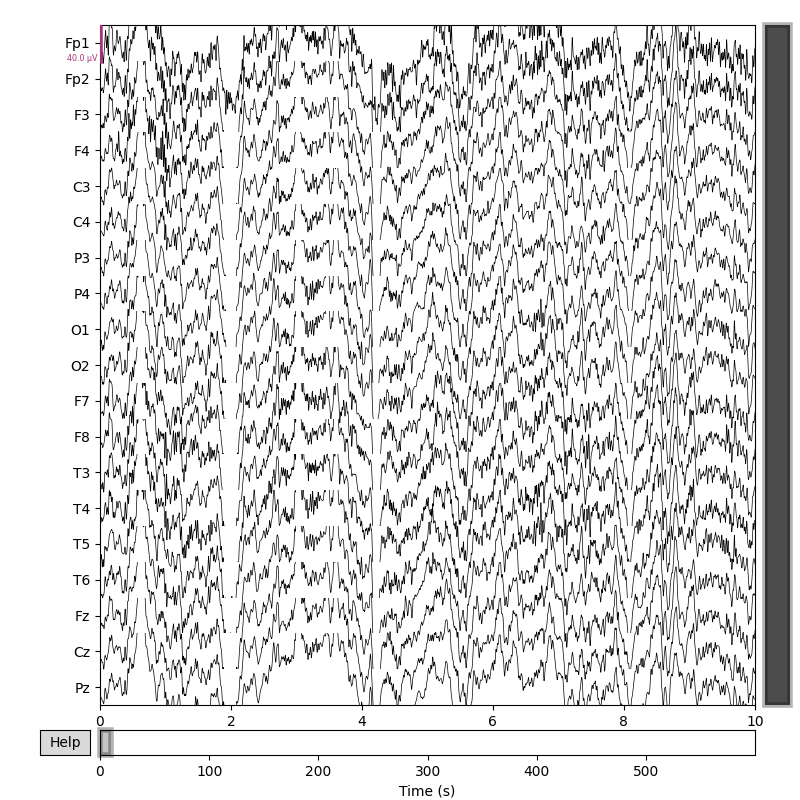

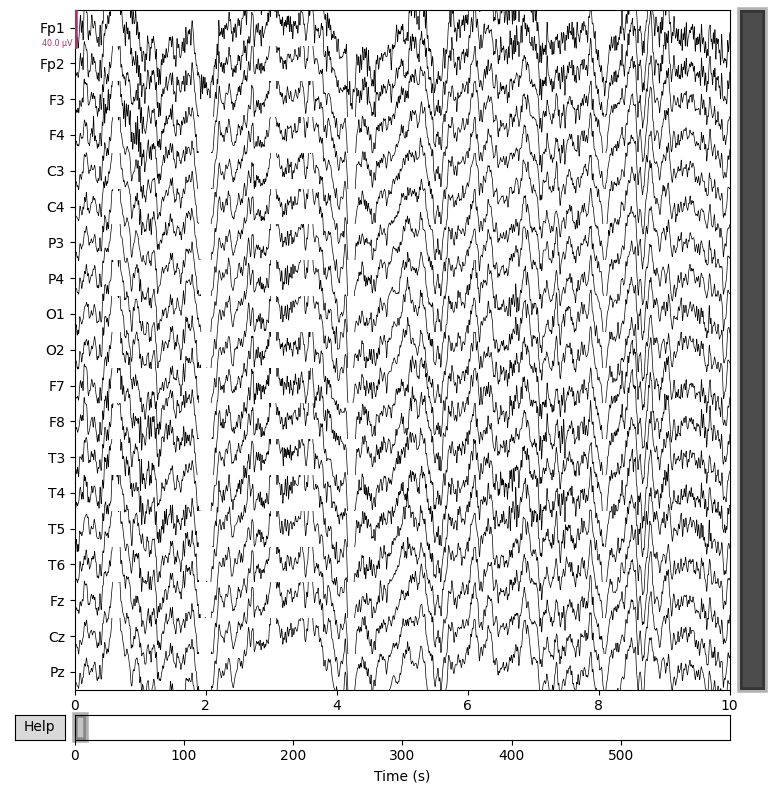

In [117]:
# enable matplotlib widgets for plotting
%matplotlib widget
EEG_data.plot()

In [118]:
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    3.0s finished


Opening raw-browser...


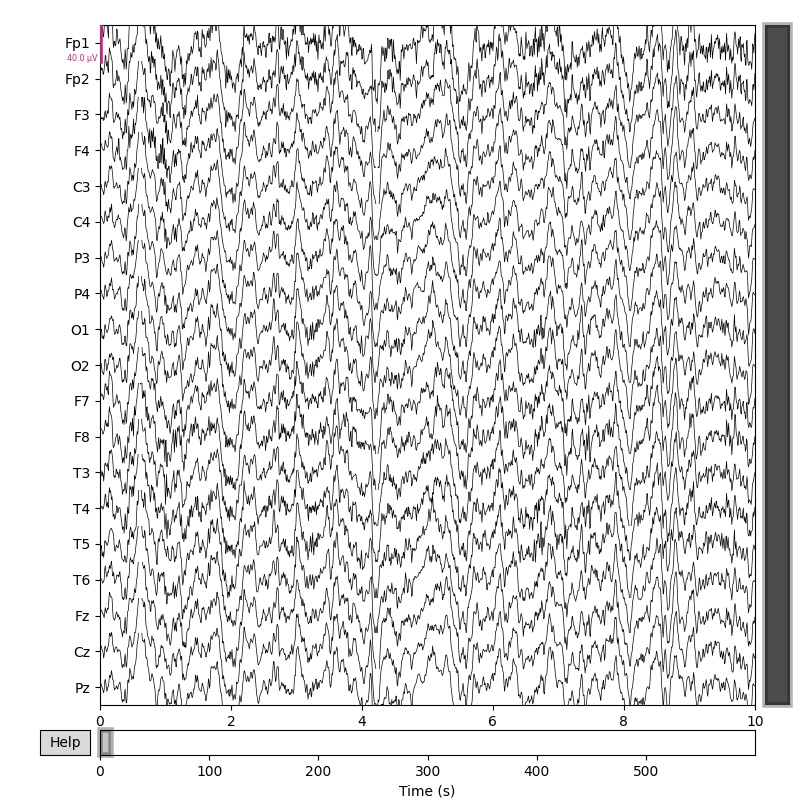

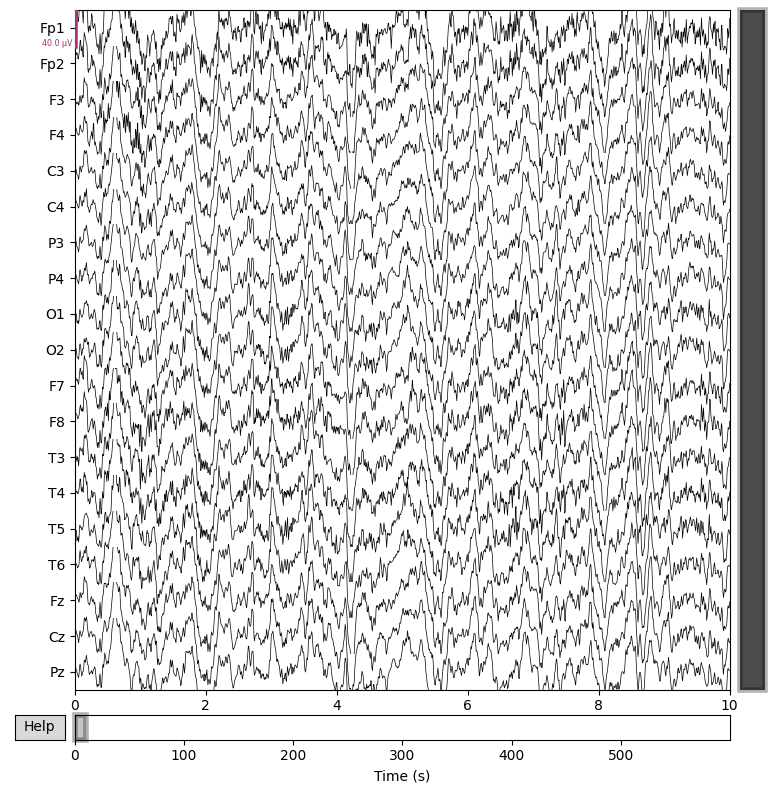

In [119]:
#raw.crop(tmax=500)
raw.plot()

In [120]:
std_montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(std_montage)

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.1s.


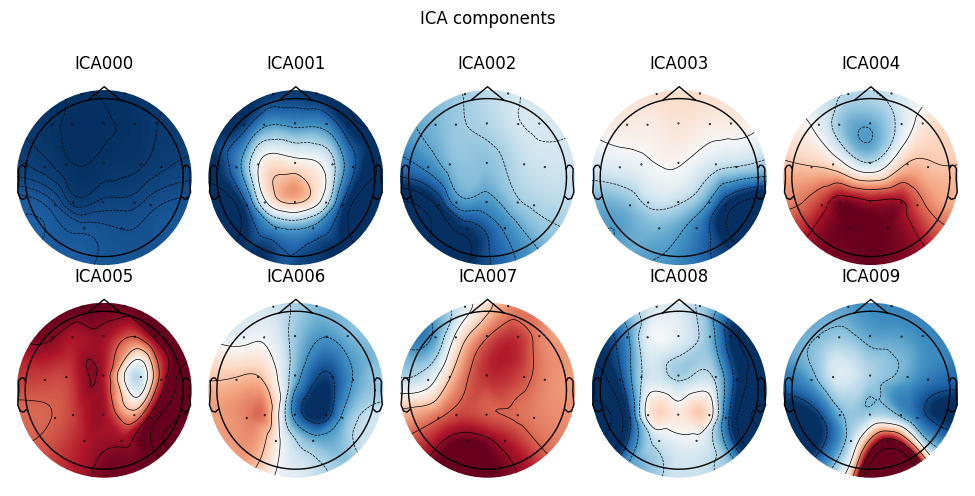

[<MNEFigure size 975x496 with 10 Axes>]

In [83]:
ica = mne.preprocessing.ICA(n_components=10, random_state=0)
ica.fit(raw.copy())
ica.plot_components(outlines='head')

In [84]:
500*300

150000

In [121]:
xRaw = raw.get_data()
len(xRaw[0])

299900

## Calculating Fractal Dimensions

In [122]:
#len(x_raw)
df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation


channel_no=0
for row in xRaw: #row === channel_no.
    
    hig_channel_series = []
    katz_channel_series = []
    petrosian_channel_series = []
    spec_ent_channel_series = []
    perm_ent_channel_series = []

    df_svd_ent_channel_series = []
    df_app_ent_channel_series = []
    df_samp_ent_channel_series = []
    df_hjorth_channel_series = []
    df_num_zerocross_channel_series = []
    df_lziv_channel_series = []
    df_det_fluc_channel_series = []
    
    for i in range(500,len(xRaw[0]),250):
        hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
        katz_channel_series.append(ant.katz_fd(row[i-500:i]))
        petrosian_channel_series.append(ant.petrosian_fd(row[i-500:i]))
        spec_ent_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=1000, method='welch', normalize=True))
        perm_ent_channel_series.append(ant.perm_entropy(row[i-500:i], normalize=True))

        df_svd_ent_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
        df_app_ent_channel_series.append(ant.app_entropy(row[i-500:i]))
        df_samp_ent_channel_series.append(ant.sample_entropy(row[i-500:i]))
        df_hjorth_channel_series.append(ant.hjorth_params(row[i-500:i]))
        df_num_zerocross_channel_series.append(ant.num_zerocross(row[i-500:i]))
        df_lziv_channel_series.append(ant.lziv_complexity(row[i-500:i]))
        df_det_fluc_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))


        
    df_higuchi.iloc[:,channel_no] = hig_channel_series
    df_katz.iloc[:,channel_no] = katz_channel_series
    df_petrosian.iloc[:,channel_no] = petrosian_channel_series
    df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
    df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series

    df_svd_ent.iloc[:,channel_no] = df_svd_ent_channel_series
    df_app_ent.iloc[:,channel_no] = df_app_ent_channel_series
    df_samp_ent.iloc[:,channel_no] = df_samp_ent_channel_series
    df_hjorth.iloc[:,channel_no] = df_hjorth_channel_series
    df_num_zerocross.iloc[:,channel_no] = df_num_zerocross_channel_series
    df_lziv.iloc[:,channel_no] = df_lziv_channel_series
    df_det_fluc.iloc[:,channel_no] = df_det_fluc_channel_series
    
    #print(len(channel_series))
    channel_no += 1

In [123]:
subject_num = int(subject.split('-')[1])

df_higuchi['subject'] = subject_num
df_katz['subject'] = subject_num
df_petrosian['subject'] = subject_num
df_spec_ent['subject'] = subject_num
df_perm_ent['subject'] = subject_num

df_svd_ent['subject'] = subject_num
df_app_ent['subject'] = subject_num
df_samp_ent['subject'] = subject_num
df_hjorth['subject'] = subject_num
df_num_zerocross['subject'] = subject_num
df_lziv['subject'] = subject_num
df_det_fluc['subject'] = subject_num

In [124]:
df_higuchi

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz,subject
0,1.245382,1.247795,1.212072,1.291242,1.151684,1.183958,1.112419,1.143296,1.163221,1.148315,1.184836,1.244224,1.196824,1.250657,1.171727,1.163786,1.152476,1.126287,1.124646,1
1,1.278525,1.265480,1.236430,1.302918,1.159453,1.179024,1.095359,1.147910,1.134545,1.136097,1.201170,1.255257,1.198960,1.277501,1.150693,1.163956,1.178028,1.143244,1.116295,1
2,1.263084,1.233825,1.240496,1.208278,1.181422,1.182599,1.153058,1.159248,1.177100,1.175762,1.221208,1.252666,1.233842,1.273886,1.190243,1.185215,1.185677,1.171128,1.154459,1
3,1.274437,1.234501,1.171563,1.143764,1.136117,1.153411,1.143662,1.128243,1.176359,1.160779,1.204924,1.235430,1.178732,1.233996,1.188784,1.151214,1.150435,1.138357,1.135601,1
4,1.282211,1.248464,1.172801,1.168543,1.151246,1.193585,1.146699,1.151804,1.167652,1.159738,1.202375,1.244359,1.181253,1.239636,1.183954,1.164263,1.159580,1.146279,1.150185,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1.203956,1.176720,1.148438,1.169821,1.105924,1.133395,1.096778,1.140995,1.144087,1.152370,1.127198,1.133993,1.152221,1.141933,1.159453,1.158983,1.140734,1.135602,1.119165,1
1194,1.162709,1.147875,1.136804,1.156320,1.076753,1.097214,1.076402,1.109695,1.123857,1.111220,1.103417,1.130825,1.139860,1.134683,1.141256,1.116931,1.124618,1.090753,1.089294,1
1195,1.166250,1.137733,1.115271,1.140185,1.096645,1.090363,1.098750,1.110173,1.133471,1.125489,1.096383,1.150675,1.124500,1.135337,1.147037,1.135495,1.109567,1.096506,1.099124,1
1196,1.185069,1.143276,1.140866,1.137405,1.148793,1.130881,1.150957,1.158326,1.184165,1.182140,1.111430,1.200517,1.162726,1.161013,1.204797,1.172085,1.130467,1.137799,1.147968,1


In [90]:
df_higuchi_final = df_higuchi_final.append(df_higuchi)
df_katz_final = df_katz_final.append(df_katz)
df_petrosian_final = df_petrosian_final.append(df_petrosian)
df_spec_ent_final = df_spec_ent_final.append(df_spec_ent)
df_perm_ent_final = df_perm_ent_final.append(df_perm_ent)

df_svd_ent_final = df_svd_ent_final.append(df_svd_ent)
df_app_ent_final = df_app_ent_final.append(df_app_ent)
df_samp_ent_final = df_samp_ent_final.append(df_samp_ent)
df_hjorth_final = df_hjorth_final.append(df_hjorth)
df_num_zerocross_final = df_num_zerocross_final.append(df_num_zerocross)
df_lziv_final = df_lziv_final.append(df_lziv)
df_det_fluc_final = df_det_fluc_final.append(df_det_fluc)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_higuchi_final = df_higuchi_final.append(df_higuchi)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_katz_final = df_katz_final.append(df_katz)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_petrosian_final = df_petrosian_final.append(df_petrosian)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spec_ent_final = df_spec_en

In [91]:
df_higuchi_final

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz,subject
0,1.245382,1.247795,1.212072,1.291242,1.151684,1.183958,1.112419,1.143296,1.163221,1.148315,1.184836,1.244224,1.196824,1.250657,1.171727,1.163786,1.152476,1.126287,1.124646,1.0
1,1.278525,1.265480,1.236430,1.302918,1.159453,1.179024,1.095359,1.147910,1.134545,1.136097,1.201170,1.255257,1.198960,1.277501,1.150693,1.163956,1.178028,1.143244,1.116295,1.0
2,1.263084,1.233825,1.240496,1.208278,1.181422,1.182599,1.153058,1.159248,1.177100,1.175762,1.221208,1.252666,1.233842,1.273886,1.190243,1.185215,1.185677,1.171128,1.154459,1.0
3,1.274437,1.234501,1.171563,1.143764,1.136117,1.153411,1.143662,1.128243,1.176359,1.160779,1.204924,1.235430,1.178732,1.233996,1.188784,1.151214,1.150435,1.138357,1.135601,1.0
4,1.282211,1.248464,1.172801,1.168543,1.151246,1.193585,1.146699,1.151804,1.167652,1.159738,1.202375,1.244359,1.181253,1.239636,1.183954,1.164263,1.159580,1.146279,1.150185,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.134276,1.105311,1.175530,1.106314,1.105454,1.100158,1.095131,1.053232,1.091414,1.061572,1.149479,1.105178,1.117408,1.122320,1.089963,1.085612,1.119520,1.130580,1.069499,3.0
607,1.103117,1.107655,1.143950,1.116078,1.158445,1.143994,1.135706,1.066070,1.111821,1.072578,1.106193,1.096204,1.118429,1.095192,1.103122,1.058235,1.114206,1.160042,1.079342,3.0
608,1.103322,1.112459,1.121470,1.121639,1.159068,1.120924,1.137778,1.057771,1.125955,1.069511,1.112411,1.108248,1.126414,1.078242,1.105286,1.057276,1.086104,1.119876,1.093302,3.0
609,1.112503,1.123904,1.122747,1.107520,1.130848,1.109386,1.134373,1.069238,1.137728,1.085183,1.123478,1.129155,1.131576,1.094506,1.120815,1.064462,1.093642,1.114928,1.123415,3.0


In [76]:
999*2

1998

In [75]:
df_det_fluc_final

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
0,1.567087,1.555791,1.615496,1.400903,1.698172,1.662095,1.751389,1.743529,1.704355,1.726433,1.668859,1.554123,1.639198,1.575511,1.697498,1.719671,1.715329,1.756679,1.758658
1,1.509575,1.516471,1.570646,1.434402,1.693811,1.651536,1.808789,1.730058,1.775161,1.780875,1.650424,1.507554,1.630627,1.497938,1.748023,1.710584,1.687875,1.736826,1.786298
2,1.518817,1.561233,1.616406,1.623050,1.712835,1.618705,1.754439,1.670934,1.702762,1.676250,1.628183,1.528047,1.596794,1.478368,1.686220,1.631067,1.704046,1.700324,1.713729
3,1.499831,1.588973,1.731731,1.762343,1.784695,1.757611,1.773752,1.791113,1.708063,1.727798,1.677042,1.640387,1.715561,1.608562,1.689759,1.742098,1.738070,1.757295,1.780591
4,1.485549,1.592503,1.751888,1.749377,1.761357,1.727159,1.754384,1.737461,1.729354,1.738494,1.671205,1.640072,1.703542,1.625461,1.703827,1.737968,1.757566,1.774335,1.749918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.703484,1.731202,1.728291,1.728683,1.772490,1.796733,1.800615,1.782346,1.755763,1.771750,1.774656,1.707207,1.765563,1.741640,1.704494,1.743337,1.744622,1.793587,1.810990
995,1.789780,1.838521,1.819737,1.802690,1.831856,1.877983,1.839204,1.822823,1.777847,1.779595,1.887308,1.813267,1.838527,1.837412,1.747359,1.790972,1.860952,1.865206,1.834568
996,1.707816,1.724999,1.802150,1.724765,1.823693,1.822693,1.828213,1.842075,1.767222,1.818184,1.835309,1.751865,1.833506,1.767907,1.739707,1.786018,1.758262,1.779263,1.836242
997,1.731842,1.742370,1.809057,1.736136,1.852724,1.792003,1.830049,1.792620,1.744357,1.784449,1.795450,1.741718,1.777277,1.757345,1.673795,1.752590,1.774766,1.754912,1.807657
